# Multi Liner Regression - CASE 1 (50_Startup)

### 1. Prepare a prediction model for profit of 50_startups data.
### 2. Do transformations for getting better predictions of profit and
### 3. make a table containing R^2 value for each prepared model.

In [1]:
import math
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



import statsmodels.api as smf

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr

import statsmodels.stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## Import & analyze Data (EDA)

In [2]:
dt=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/50_Startups.csv")
dt.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dt.shape

(50, 5)

In [5]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
dt.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
missing_value=["n/a","na","NaN"]
dt=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/50_Startups.csv",na_values=missing_value)
dt.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# ======================================

# Data Rename

In [8]:
dt=dt.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKT'},axis=1)
dt.head(5)

,RDS,ADM,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## checking the relation of catergoical variable and others

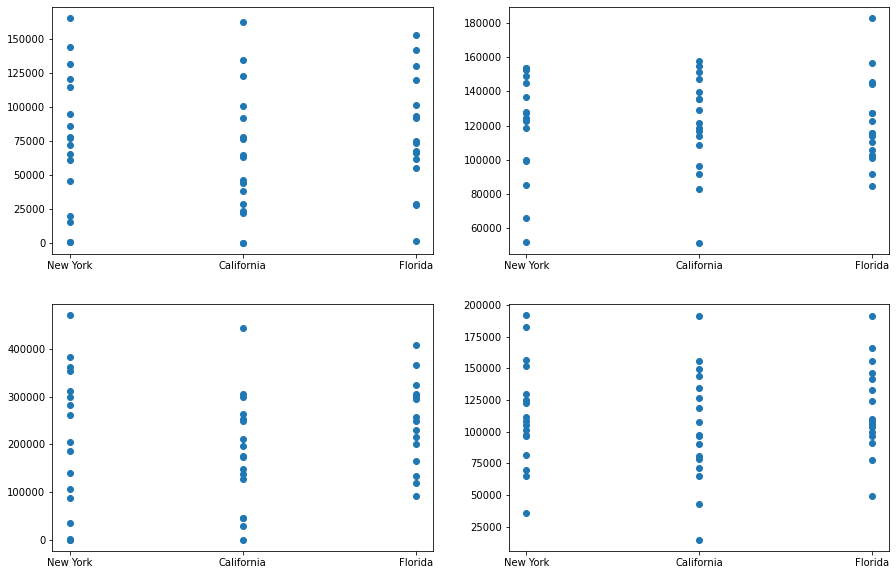

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(dt['State'], dt['RDS'])
ax2.scatter(dt['State'], dt['ADM'])
ax3.scatter(dt['State'], dt['MKT'])
ax4.scatter(dt['State'], dt['Profit'])
plt.show()

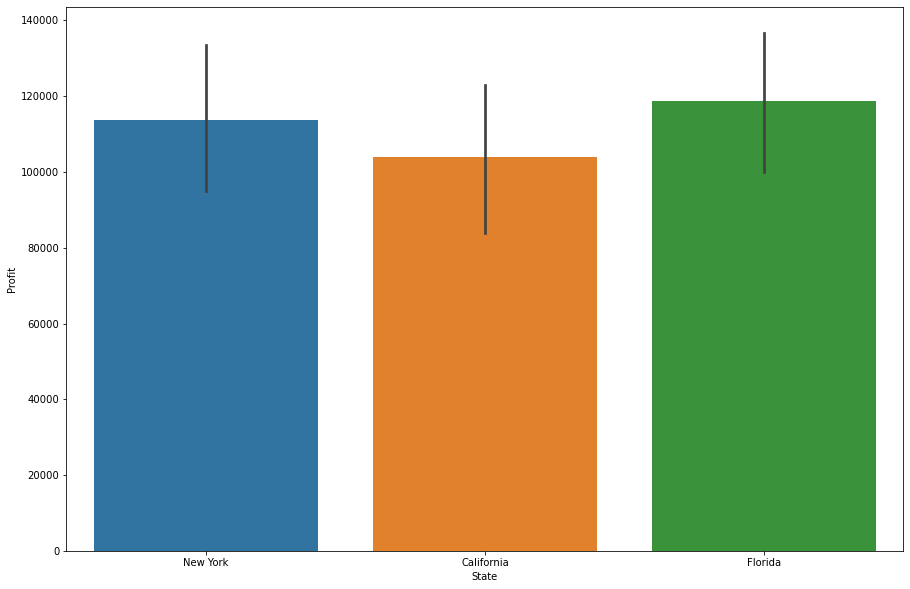

In [10]:
#relationship of State variable with Y
sns.barplot(x='State',y='Profit',data=dt)
plt.show()

##### There is not significant difference of profit per state, dropping this feature



In [11]:
dt=dt.drop(["State"],axis=1)
dt.head(5)

,RDS,ADM,MKT,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [12]:
dt.shape

(50, 4)

## Check if the data is Balanced and normally distributed

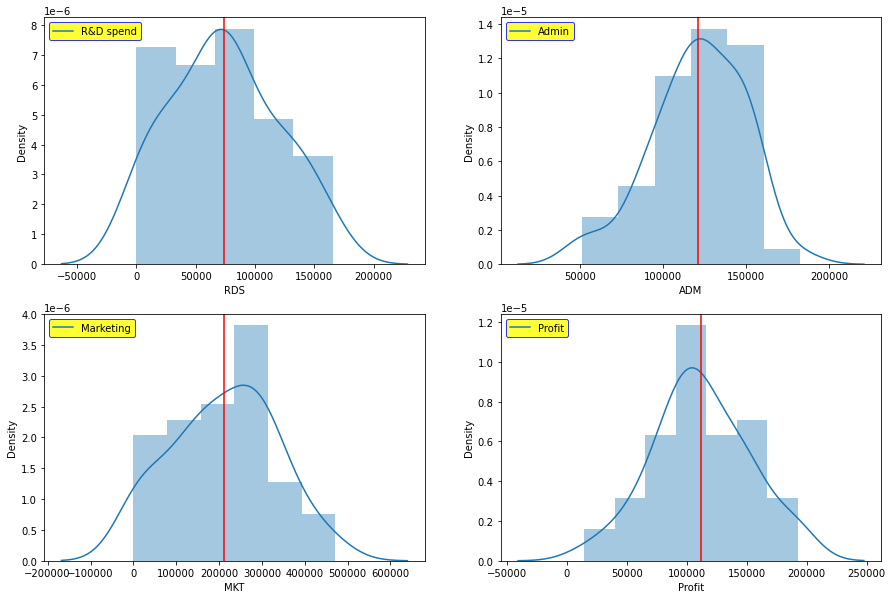

In [13]:
# Visualizing of the distribution 

#creating first plot 
plt.subplot(2,2,1)
RDS = sns.distplot(dt['RDS'])
plt.axvline(dt["RDS"].mean(),color='r')
plt.legend(["R&D spend"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second plot

plt.subplot(2,2,2)
ADM = sns.distplot(dt['ADM'])
plt.axvline(dt["ADM"].mean(),color='r')
plt.legend(["Admin"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.subplot(2,2,3)
ADM = sns.distplot(dt['MKT'])
plt.axvline(dt["MKT"].mean(),color='r')
plt.legend(["Marketing"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.subplot(2,2,4)
ADM = sns.distplot(dt['Profit'])
plt.axvline(dt["Profit"].mean(),color='r')
plt.legend(["Profit"],loc='upper left',facecolor='yellow',edgecolor='blue')



In [14]:
dt.skew()

RDS       0.164002
ADM      -0.489025
MKT      -0.046472
Profit    0.023291
dtype: float64

In [15]:
# Shappiro test to check the data normalisation for sorting time

from scipy.stats import shapiro

for i in range (0,4):
    DataToTest=dt[dt.columns[i]]


    stat,p = shapiro(DataToTest)

    print('stat=%.2f, p=%.3f' % (stat,p))

    if p > .05:
        print(dt.columns[i],": Normal Distribution")
    else:
        print(dt.columns[i],":Not normal distribution")
    
    

stat=0.97, p=0.180
RDS : Normal Distribution
stat=0.97, p=0.237
ADM : Normal Distribution
stat=0.97, p=0.345
MKT : Normal Distribution
stat=0.98, p=0.767
Profit : Normal Distribution


In [16]:
# K2 test to check the data normalisation 
from scipy.stats import normaltest
for i in range (0,4):
    DataToTest=dt[dt.columns[i]]


    stat,p = shapiro(DataToTest)

    print('stat=%.2f, p=%.3f' % (stat,p))

    if p > .05:
        print(dt.columns[i],": Normal Distribution")
    else:
        print(dt.columns[i],":Not normal distribution")
    

stat=0.97, p=0.180
RDS : Normal Distribution
stat=0.97, p=0.237
ADM : Normal Distribution
stat=0.97, p=0.345
MKT : Normal Distribution
stat=0.98, p=0.767
Profit : Normal Distribution


## Checking Correlation

In [17]:
# Spearman and Pearseon Corelation for continous variables

from scipy.stats import spearmanr


#firstsample=dt["DeliveryTime"]
#secondsample=dt["SortingTime"]
for j in range(3,0,-1):

    for i in range(0,4):
        if i <3:
#            print(i)
            sample1=dt[dt.columns[i]]
            sample2=dt[dt.columns[j]]
#            print(j)
            if i!=j:
                stat,p = spearmanr(sample1,sample2)
                print('stat=%.2f, p=%.8f' % (stat,p))
                if p > .05:
                    print(dt.columns[i],":",dt.columns[j],"--independent variables")
                else:
                    print(dt.columns[i],":",dt.columns[j],"--dependent variables")
        
            else:
                exit
  

stat=0.99, p=0.00000000
RDS : Profit --dependent variables
stat=0.17, p=0.24184095
ADM : Profit --independent variables
stat=0.72, p=0.00000000
MKT : Profit --dependent variables
stat=0.71, p=0.00000001
RDS : MKT --dependent variables
stat=-0.10, p=0.50678542
ADM : MKT --independent variables
stat=0.19, p=0.18110142
RDS : ADM --independent variables
stat=-0.10, p=0.50678542
MKT : ADM --independent variables


In [18]:
dt.corr(method='spearman')

,RDS,ADM,MKT,Profit
RDS,1.000000,0.192226,0.709905,0.989844
ADM,0.192226,1.000000,-0.096096,0.168595
MKT,0.709905,-0.096096,1.000000,0.721366
Profit,0.989844,0.168595,0.721366,1.000000


In [19]:
dt.corr()

,RDS,ADM,MKT,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0.5, 365.50909090909096, 'spearman correlation')

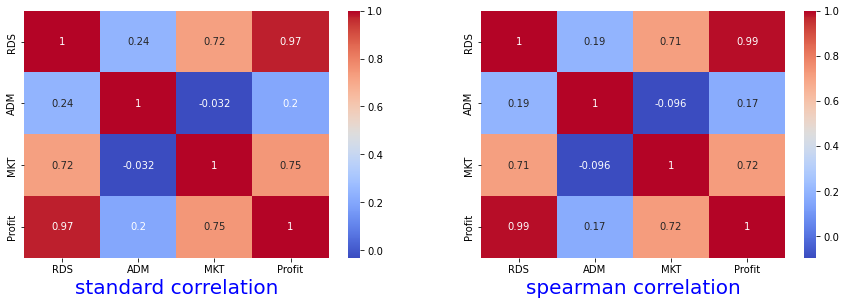

In [20]:
plt.subplot(2,2,1)
heatmap= sns.heatmap(dt.corr(),annot=True,cmap="coolwarm")
plt.xlabel("standard correlation",size=20,color="blue")

plt.subplot(2,2,2)
heatmap= sns.heatmap(dt.corr(method='spearman'),annot=True,cmap="coolwarm")
plt.xlabel("spearman correlation",size=20,color="blue")

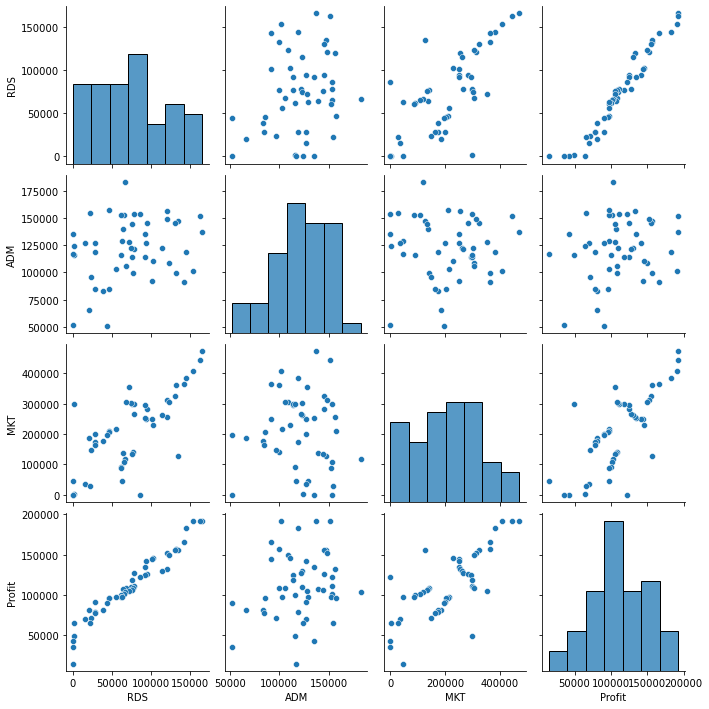

In [21]:
# Creating pairplot
sns.pairplot(dt[['RDS','ADM','MKT','Profit']])

##### From the above we can see that,  R&D specnd(RSD) and marketing (MKT)  have a +ve correlation with Profit and can be considerd as significant features.

## Check Outliers 

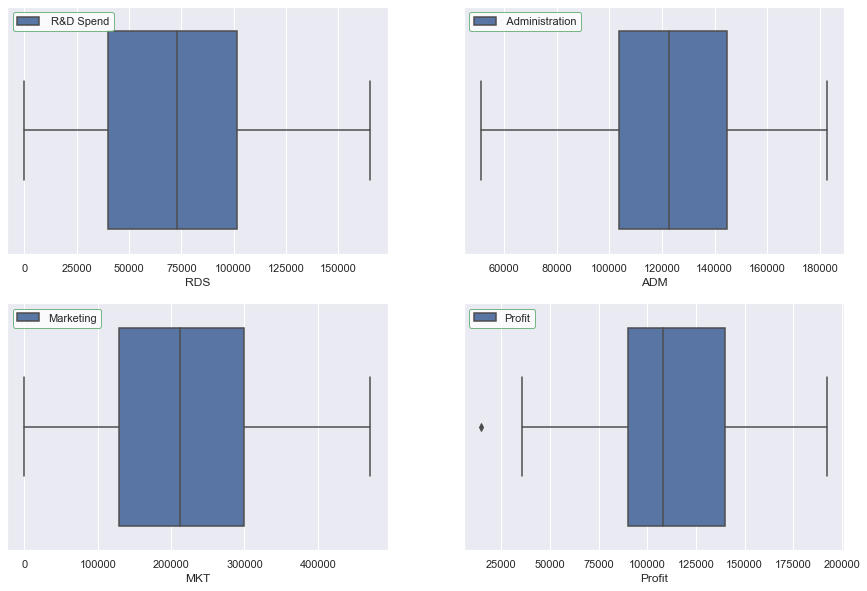

In [22]:
# Using boxplots to detect outliers
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot 
plt.subplot(2,2,1)
ax = sns.boxplot(x=dt['RDS'])
plt.legend([' R&D Spend'],loc='upper left',facecolor='white',edgecolor='g')

# Creating second plot
plt.subplot(2,2,2)
ax = sns.boxplot(x=dt['ADM'])
plt.legend([" Administration"],loc='upper left',facecolor='white',edgecolor='g')

# Creating third plot
plt.subplot(2,2,3)
ax = sns.boxplot(x=dt['MKT'])
plt.legend(["Marketing"],loc='upper left',facecolor='white',edgecolor='g')

# Creating fourth plot
plt.subplot(2,2,4)
ax = sns.boxplot(x=dt['Profit'])
plt.legend(["Profit"],loc='upper left',facecolor='white',edgecolor='g')


plt.show()

##### Only profit has one data point as outlier

# ***Feature importance ( not required, doing for practice purpose only)***

In [23]:
X=dt.iloc[:,:-1]
y=dt.iloc[:,3]

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X,y)

RandomForestRegressor()

In [25]:
rf.feature_importances_

array([0.92297261, 0.00804682, 0.06898058])

Text(0.5, 0, 'Random Forest Feature Importance')

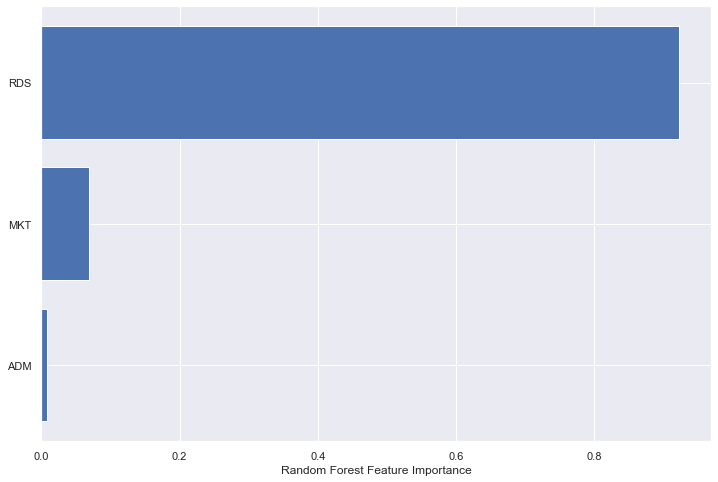

In [26]:
#Sorting and displaying the value
plt.figure(figsize=(12,8))


sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [27]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X, y)

Text(0.5, 0, 'Permutation Importance')

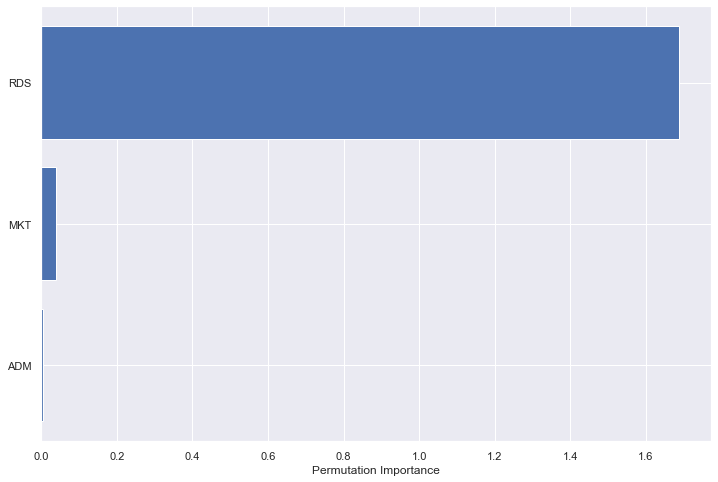

In [28]:
plt.figure(figsize=(12,8))

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Model Without scaling- RAW Data Model

In [29]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm


# create model with individual features

model_RnD_noscaling=sm.ols("Profit~RDS",data=dt).fit()


print('p-value:', "\n" ,model_RnD_noscaling.pvalues)
print("R-squared value","\n",np.round(model_RnD_noscaling.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_RnD_noscaling.rsquared_adj,4))
print("t-value:","\n",np.round(model_RnD_noscaling.tvalues,4))

if model_RnD_noscaling.pvalues.RDS > .05:
    print("Feature Not Significant")
else:
    print("Feature \n Significant")


p-value: 
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64
R-squared value 
 0.9465
Adjusted R-squared value: 
 0.9454
t-value: 
 Intercept    19.3203
RDS          29.1511
dtype: float64
Feature 
 Significant


In [30]:
model_ADM_noscaling=sm.ols("Profit~ADM",data=dt).fit()
print('p-value:', "\n" ,model_ADM_noscaling.pvalues)
print("R-squared value","\n",np.round(model_ADM_noscaling.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_ADM_noscaling.rsquared_adj,4))
print("t-value:","\n",np.round(model_ADM_noscaling.tvalues,4))

if model_ADM_noscaling.pvalues.ADM > .05:
    print("Feature \n Not Significant")
else:
    print("Feature \n Significant")

p-value: 
 Intercept    0.003824
ADM          0.162217
dtype: float64
R-squared value 
 0.0403
Adjusted R-squared value: 
 0.0203
t-value: 
 Intercept    3.0400
ADM          1.4195
dtype: float64
Feature 
 Not Significant


In [31]:
model_MKT_noscaling=sm.ols("Profit~MKT",data=dt).fit()
print('p-value:', "\n" ,model_MKT_noscaling.pvalues)
print("R-squared value","\n",np.round(model_MKT_noscaling.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_MKT_noscaling.rsquared_adj,4))
print("t-value:","\n",np.round(model_MKT_noscaling.tvalues,4))

if model_MKT_noscaling.pvalues.MKT > .05:
    print("Feature \n Not Significant")
else:
    print("Feature \n Significant")

p-value: 
 Intercept    4.294735e-10
MKT          4.381073e-10
dtype: float64
R-squared value 
 0.5592
Adjusted R-squared value: 
 0.55
t-value: 
 Intercept    7.8084
MKT          7.8027
dtype: float64
Feature 
 Significant


In [32]:
model_RDS_ADM_NS = sm.ols('Profit~RDS+ADM',data=dt).fit()
print('p-value:', "\n" ,model_RDS_ADM_NS.pvalues)
print("R-squared value","\n",np.round(model_RDS_ADM_NS.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_RDS_ADM_NS.rsquared_adj,4))
print("t-value:","\n",np.round(model_RDS_ADM_NS.tvalues,4))

p-value: 
 Intercept    5.695336e-12
RDS          2.278348e-31
ADM          2.888932e-01
dtype: float64
R-squared value 
 0.9478
Adjusted R-squared value: 
 0.9456
t-value: 
 Intercept     9.1224
RDS          28.5889
ADM          -1.0727
dtype: float64


##### No significant change in R^2 and the adjusted value

In [33]:
model_RDS_MKT_NS = sm.ols('Profit~RDS+MKT',data=dt).fit()
print('p-value:', "\n" ,model_RDS_MKT_NS.pvalues)
print("R-squared value","\n",np.round(model_RDS_MKT_NS.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_RDS_MKT_NS.rsquared_adj,4))
print("t-value:","\n",np.round(model_RDS_MKT_NS.tvalues,4))

p-value: 
 Intercept    3.504062e-22
RDS          6.040433e-24
MKT          6.003040e-02
dtype: float64
R-squared value 
 0.9505
Adjusted R-squared value: 
 0.9483
t-value: 
 Intercept    17.4636
RDS          19.2656
MKT           1.9271
dtype: float64


##### R^2 value improved

In [34]:
model_ADM_MKT_NS = sm.ols('Profit~ADM+MKT',data=dt).fit()
print('p-value:', "\n" ,model_ADM_MKT_NS.pvalues)
print("R-squared value","\n",np.round(model_ADM_MKT_NS.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_ADM_MKT_NS.rsquared_adj,4))
print("t-value:","\n",np.round(model_ADM_MKT_NS.tvalues,4))

p-value: 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKT          9.727245e-11
dtype: float64
R-squared value 
 0.6097
Adjusted R-squared value: 
 0.5931
t-value: 
 Intercept    1.1427
ADM          2.4678
MKT          8.2810
dtype: float64


In [35]:
model_RDS_ADM_MKT_NS = sm.ols('Profit~ADM+MKT+RDS',data=dt).fit()
print('p-value:', "\n" ,model_RDS_ADM_MKT_NS.pvalues)
print("R-squared value","\n",np.round(model_RDS_ADM_MKT_NS.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_RDS_ADM_MKT_NS.rsquared_adj,4))
print("t-value:","\n",np.round(model_RDS_ADM_MKT_NS.tvalues,4))

p-value: 
 Intercept    1.057379e-09
ADM          6.017551e-01
MKT          1.047168e-01
RDS          2.634968e-22
dtype: float64
R-squared value 
 0.9507
Adjusted R-squared value: 
 0.9475
t-value: 
 Intercept     7.6262
ADM          -0.5255
MKT           1.6551
RDS          17.8464
dtype: float64


# Model Validation 

### Checking colinerity (feature independence with each other) using VIF

In [36]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=sm.ols("RDS~ADM+MKT",data=dt).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=sm.ols("ADM~RDS+MKT",data=dt).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=sm.ols("MKT~RDS+ADM",data=dt).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADM','MKT'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MKT,2.326773


### none of VIF > 20, so no colinerity and all features are part of regression model 

### 2. Residual Analysis

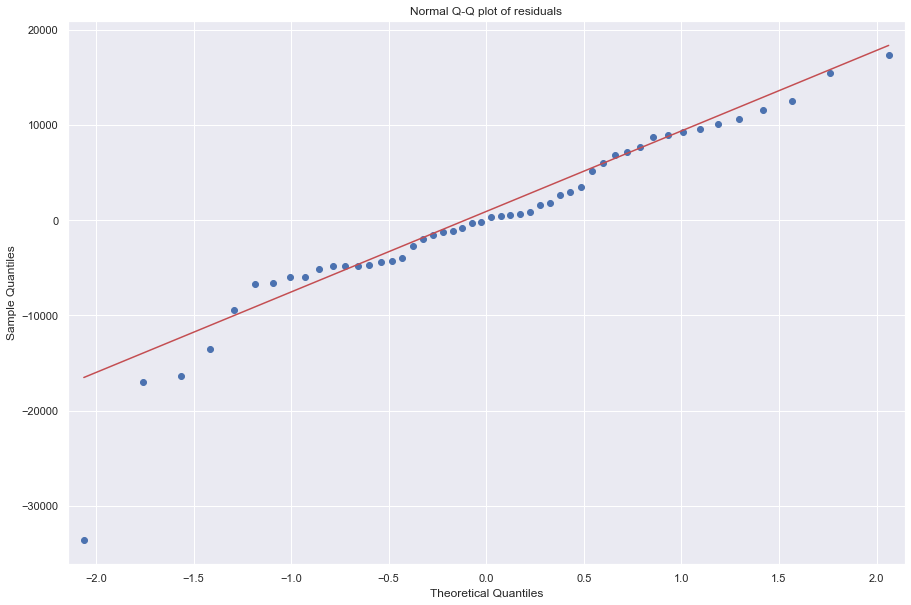

In [37]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
sm.qqplot(model_RDS_ADM_MKT_NS.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [38]:
list(np.where(model_RDS_ADM_MKT_NS.resid<-30000))

[array([49])]

### Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)



In [39]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  #  z = (x - mu)/sigma

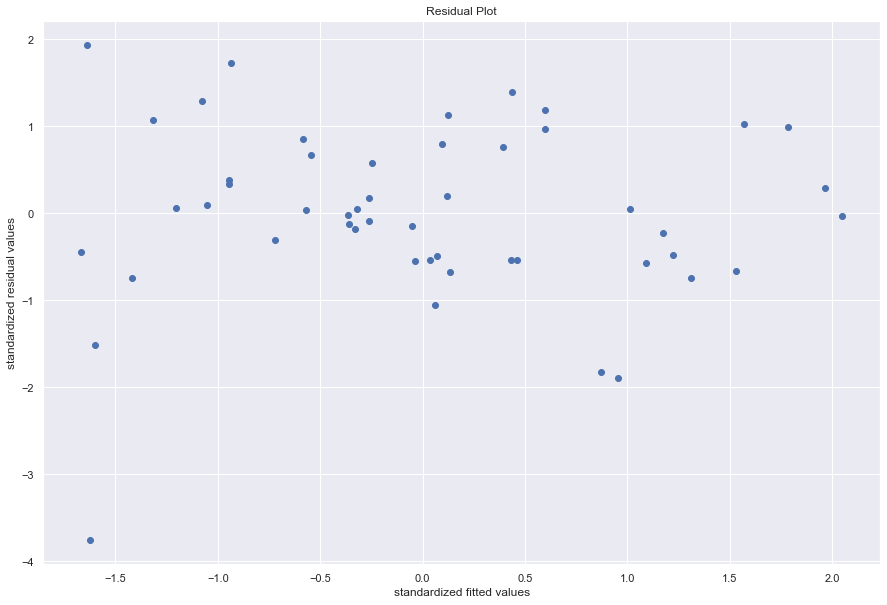

In [40]:
plt.scatter(standard_values(model_RDS_ADM_MKT_NS.fittedvalues),standard_values(model_RDS_ADM_MKT_NS.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Resduals Vs Regressors

eval_env: 1


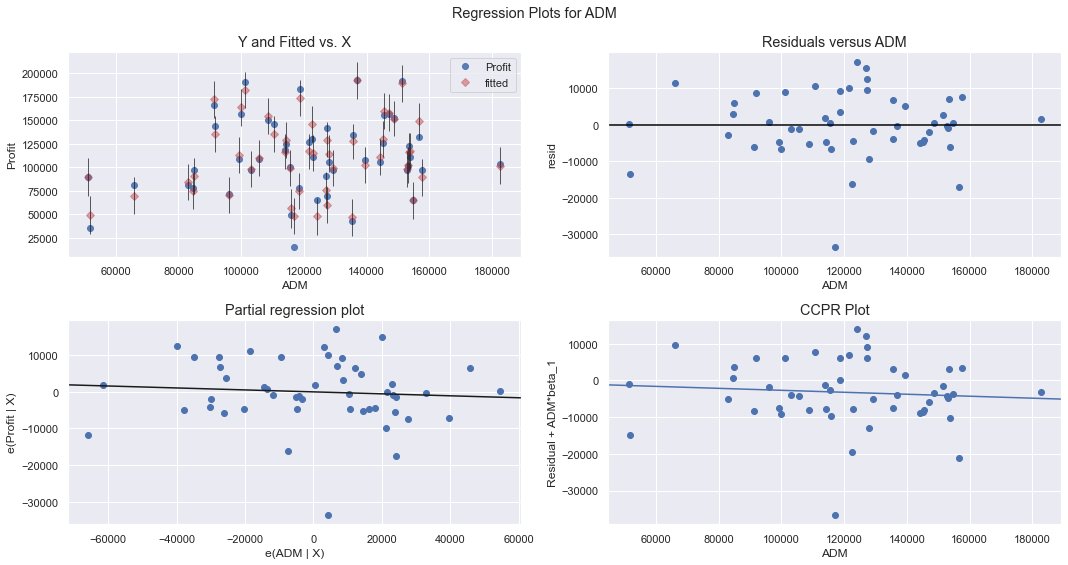

In [41]:
import statsmodels.formula.api as sm
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model_RDS_ADM_MKT_NS,'ADM',fig=fig)
plt.show()

eval_env: 1


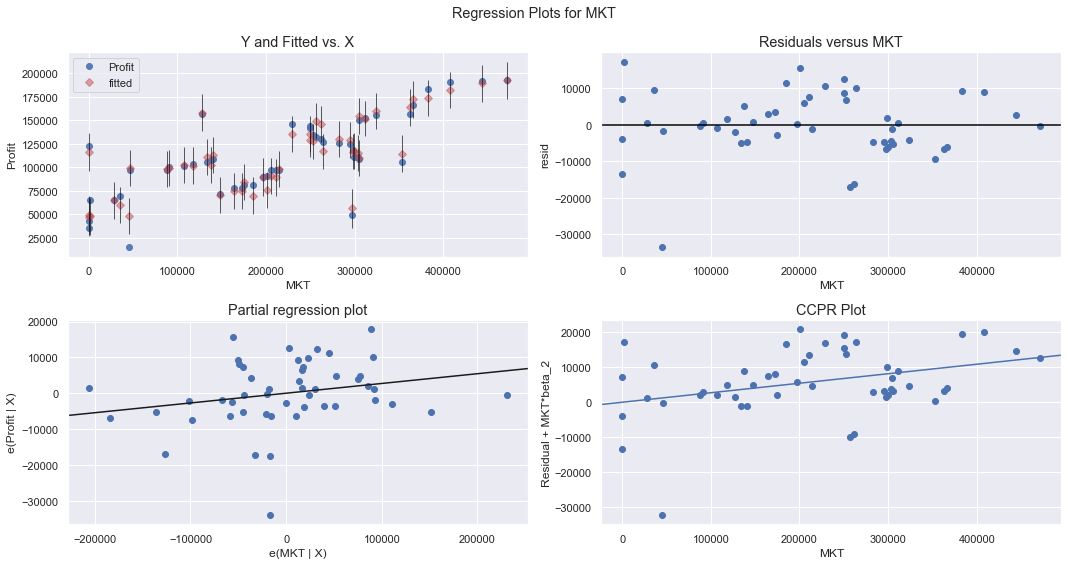

In [42]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model_RDS_ADM_MKT_NS,'MKT',fig=fig)
plt.show()

In [43]:
residuals=model_RDS_ADM_MKT_NS.resid
np.mean(residuals)

1.0622898116707802e-10

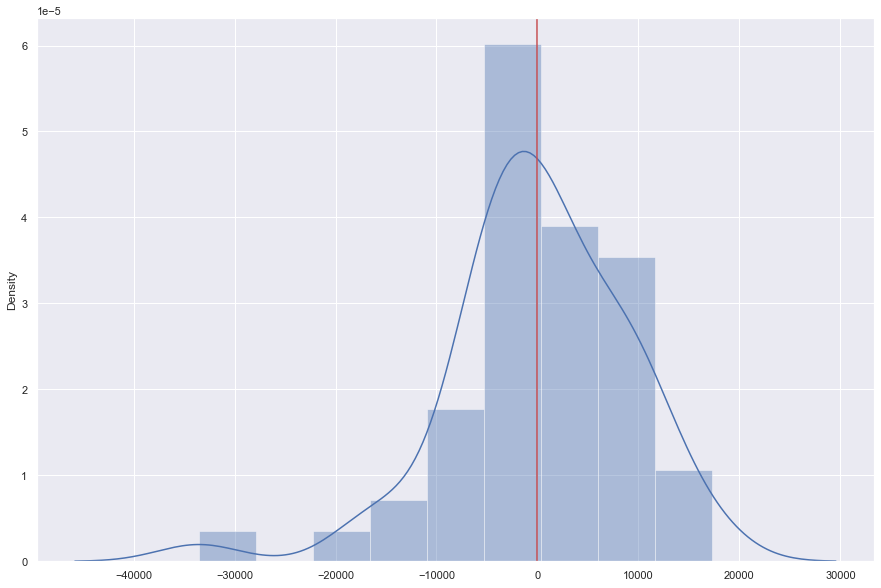

In [44]:
import seaborn as sns
sns.distplot(residuals)
plt.axvline(np.mean(residuals),color='r')

# Model Deletion Diagnostics (checking Outliers or Influencers)
###  Cook's Distance 


In [45]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_)=model_RDS_ADM_MKT_NS.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

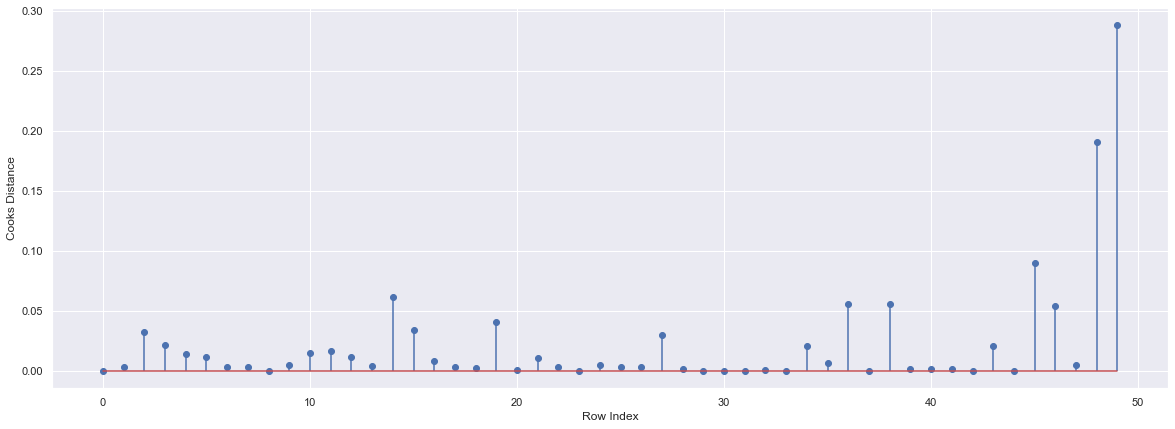

In [46]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(dt)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
# Index and value of influencer where C>0.3
np.argmax(c) , np.max(c)

(49, 0.2880822927543259)

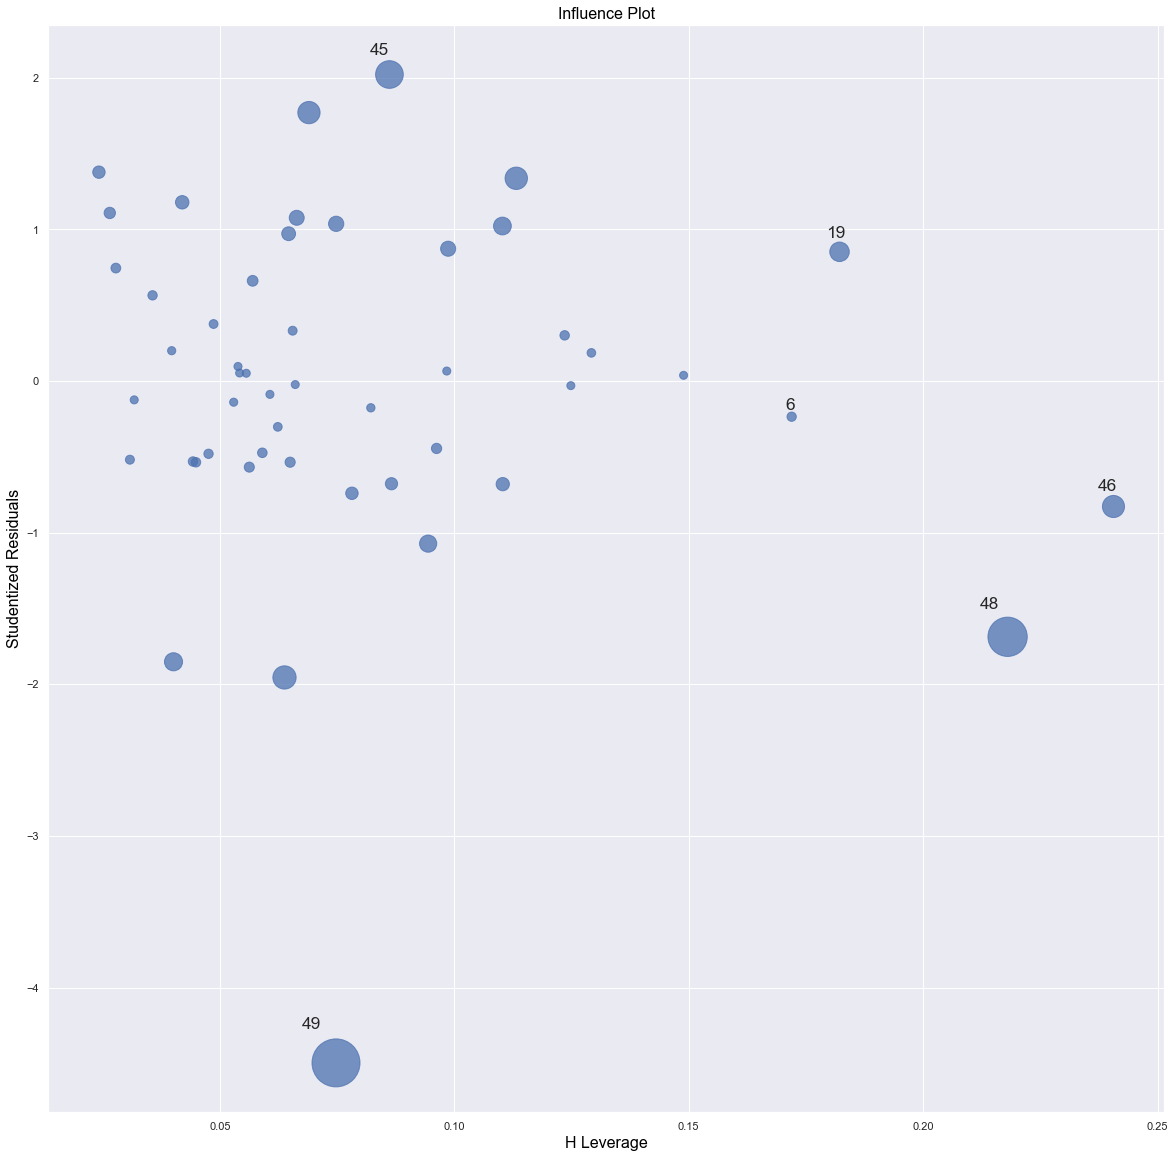

In [48]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model_RDS_ADM_MKT_NS,ax = ax)
plt.show()


In [49]:

k=dt.shape[1]
n=dt.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.3


In [50]:
np.where(c>0.3)

(array([], dtype=int64),)

In [51]:
dt[dt.index.isin([49])] 

,RDS,ADM,MKT,Profit
49,0.0,116983.8,45173.06,14681.4


# Improving the model

In [52]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dt1=dt.drop(dt.index[[49]],axis=0).reset_index(drop=True)
dt1.tail(5)

,RDS,ADM,MKT,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


In [53]:
import statsmodels.formula.api as sm
final_model=sm.ols("Profit~RDS+ADM+MKT",data=dt1).fit()
final_model.rsquared,final_model.rsquared_adj
print("Thus model accuracy is improved to",final_model.rsquared,final_model.rsquared_adj)

Thus model accuracy is improved to 0.9613162435129847 0.9587373264138503


# Model With Scaling

In [54]:
array_dt=dt.values
dt_stand=StandardScaler().fit(array_dt).transform(array_dt)
dt_stand[0:10]

array([[ 2.01641149,  0.56075291,  2.15394309,  2.01120333],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.99942997],
       [ 1.75436374, -0.72825703,  1.62652767,  1.98084225],
       [ 1.55478369, -0.09636463,  1.42221024,  1.77662724],
       [ 1.5049372 , -1.07991935,  1.28152771,  1.35774012],
       [ 1.27980001, -0.77623907,  1.25421046,  1.12724963],
       [ 1.34006641,  0.93214721, -0.68814993,  1.10548055],
       [ 1.24505666,  0.87198001,  0.93218598,  1.09620987],
       [ 1.03036886,  0.9869521 ,  0.83088691,  1.00746967],
       [ 1.09181921, -0.45664025,  0.77610744,  0.94602247]])

In [55]:
# creating dataframe 
dt_stand_scaling=pd.DataFrame({'rds':dt_stand[:,0],'adm':dt_stand[:,1],'mkt':dt_stand[:,2],'profit':dt_stand[:,3]})
dt_stand_scaling.head(5)

,rds,adm,mkt,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


# Only checking the model with scaling data that has best R square values previously

In [56]:
model_RDS_ADM_MKT_scaling = sm.ols('profit~adm+mkt+rds',data=dt_stand_scaling).fit()
print('p-value:', "\n" ,model_RDS_ADM_MKT_scaling.pvalues)
print("R-squared value","\n",np.round(model_RDS_ADM_MKT_scaling.rsquared,4))
print("Adjusted R-squared value:","\n",np.round(model_RDS_ADM_MKT_scaling.rsquared_adj,4))
print("t-value:","\n",np.round(model_RDS_ADM_MKT_scaling.tvalues,4))

p-value: 
 Intercept    1.000000e+00
adm          6.017551e-01
mkt          1.047168e-01
rds          2.634968e-22
dtype: float64
R-squared value 
 0.9507
Adjusted R-squared value: 
 0.9475
t-value: 
 Intercept    -0.0000
adm          -0.5255
mkt           1.6551
rds          17.8464
dtype: float64


## The R squared value is not different than the unscaled data (Model model_RDS_ADM_MKT_NS), so scaling didnt add any value

# Final Result With R square value only

In [71]:
results={'Models':['model_RnD_noscaling','model_ADM_noscaling','model_MKT_noscaling','model_RDS_ADM_NS','model_RDS_MKT_NS','model_ADM_MKT_NS','model_RDS_ADM_MKT_NS','model_RDS_ADM_MKT_scaling','final_model_rm_outliers'],
   'R-squared values':[model_RnD_noscaling.rsquared,model_ADM_noscaling.rsquared,model_MKT_noscaling.rsquared,model_RDS_ADM_NS.rsquared,model_RDS_MKT_NS.rsquared,model_ADM_MKT_NS.rsquared,model_RDS_ADM_MKT_NS.rsquared,model_RDS_ADM_MKT_scaling.rsquared,final_model.rsquared],
   }
output=pd.DataFrame(results)
output

,Models,R-squared values
0,model_RnD_noscaling,0.946535
1,model_ADM_noscaling,0.040287
2,model_MKT_noscaling,0.559154
3,model_RDS_ADM_NS,0.947813
4,model_RDS_MKT_NS,0.950450
5,model_ADM_MKT_NS,0.609723
6,model_RDS_ADM_MKT_NS,0.950746
7,model_RDS_ADM_MKT_scaling,0.950746
8,final_model_rm_outliers,0.961316


# Now checking the RMSE

In [58]:
pred1=model_RnD_noscaling.predict()
rmse1=np.sqrt(mean_squared_error(dt.Profit,pred1))
print("RMSE  is:",rmse1)

RMSE  is: 9226.100548285232


In [59]:
pred2=model_ADM_noscaling.predict()
rmse2=np.sqrt(mean_squared_error(dt.Profit,pred2))
print("RMSE  is:",rmse2)

RMSE  is: 39089.07005473707


In [60]:
pred3=model_MKT_noscaling.predict()
rmse3=np.sqrt(mean_squared_error(dt.Profit,pred3))
print("RMSE  is:",rmse3)

RMSE  is: 26492.82942981263


In [61]:
pred4=model_RDS_ADM_NS.predict()
rmse4=np.sqrt(mean_squared_error(dt.Profit,pred4))
print("RMSE  is:",rmse4)

RMSE  is: 9115.197927536368


In [62]:
pred5=model_RDS_MKT_NS.predict()
rmse5=np.sqrt(mean_squared_error(dt.Profit,pred5))
print("RMSE  is:",rmse5)

RMSE  is: 8881.88589244917


In [63]:
pred6=model_ADM_MKT_NS.predict()
rmse6=np.sqrt(mean_squared_error(dt.Profit,pred6))
print("RMSE  is:",rmse6)

RMSE  is: 24927.06663247542


In [64]:
pred7=model_RDS_ADM_MKT_NS.predict()
rmse7=np.sqrt(mean_squared_error(dt.Profit,pred7))
print("RMSE  is:",rmse7)

RMSE  is: 8855.34448901514


In [65]:
pred8=final_model.predict()
rmse8=np.sqrt(mean_squared_error(dt1.Profit,pred8))
print("RMSE  is:",rmse8)

RMSE  is: 7430.589093678349


In [66]:
pred9=model_RDS_ADM_MKT_scaling.predict()
rmse9=np.sqrt(mean_squared_error(dt.Profit,pred9))
print("RMSE  is:",rmse9)

RMSE  is: 118906.90425645524


In [73]:
results={'Models':['model_RnD_noscaling','model_ADM_noscaling','model_MKT_noscaling','model_RDS_ADM_NS','model_RDS_MKT_NS','model_ADM_MKT_NS','model_RDS_ADM_MKT_NS','model_RDS_ADM_MKT_scaling','final_model_rm_outliers'],
   'R-squared values':[model_RnD_noscaling.rsquared,model_ADM_noscaling.rsquared,model_MKT_noscaling.rsquared,model_RDS_ADM_NS.rsquared,model_RDS_MKT_NS.rsquared,model_ADM_MKT_NS.rsquared,model_RDS_ADM_MKT_NS.rsquared,model_RDS_ADM_MKT_scaling.rsquared,final_model.rsquared,],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse9,rmse8]}
output=pd.DataFrame(results)
output

,Models,R-squared values,RMSE
0,model_RnD_noscaling,0.946535,9226.100548
1,model_ADM_noscaling,0.040287,39089.070055
2,model_MKT_noscaling,0.559154,26492.829430
3,model_RDS_ADM_NS,0.947813,9115.197928
4,model_RDS_MKT_NS,0.950450,8881.885892
5,model_ADM_MKT_NS,0.609723,24927.066632
6,model_RDS_ADM_MKT_NS,0.950746,8855.344489
7,model_RDS_ADM_MKT_scaling,0.950746,118906.904256
8,final_model_rm_outliers,0.961316,7430.589094


# Final Prediction

# Per the above the after removing the outlier data per cook's distance ""final model with ADM+ RDS+MKT""  is the best model that can yeild higher profit with high R square value and low RMSE.
